In [158]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [159]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')

In [160]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,ban_days,days_since_order,days_since_reopen,ann_to_eff
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0


In [161]:
sociohealth = pd.read_csv('data/sociohealth.csv')
sociohealth

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,0.239569,0.734358
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,208563,51.5,42.3,117.0,19.60,21.80,11.10,0.65,0.195653,0.773515
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,25965,46.9,67.8,69.0,18.00,21.10,12.10,1.55,0.466603,0.522714
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,22643,46.4,68.4,128.0,15.85,20.75,9.95,0.35,0.214220,0.769662
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,44165,48.2,10.9,88.0,10.60,26.85,12.00,1.85,0.194046,0.729428
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,23191,48.4,46.4,229.0,13.55,19.00,12.50,3.95,0.600608,0.321945
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,20773,49.4,43.1,106.0,12.35,29.45,12.10,1.00,0.149261,0.764187
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,8235,49.7,36.0,97.0,20.80,23.90,16.20,0.50,0.143203,0.783580


In [162]:
X = state_orders[['ban_days','days_since_order', 'days_since_reopen', 'ann_to_eff']]

In [163]:
X = state_orders[['ban_days','days_since_order', 'days_since_reopen']]

In [164]:
X = pd.merge(state_orders, sociohealth, how = 'left', on = 'FIPS')

In [165]:
X

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,ban_days,days_since_order,days_since_reopen,ann_to_eff,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,0.239569,0.734358
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,208563,51.5,42.3,117.0,19.60,21.80,11.10,0.65,0.195653,0.773515
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,25965,46.9,67.8,69.0,18.00,21.10,12.10,1.55,0.466603,0.522714
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,22643,46.4,68.4,128.0,15.85,20.75,9.95,0.35,0.214220,0.769662
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,44165,48.2,10.9,88.0,10.60,26.85,12.00,1.85,0.194046,0.729428
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,23191,48.4,46.4,229.0,13.55,19.00,12.50,3.95,0.600608,0.321945
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,20773,49.4,43.1,106.0,12.35,29.45,12.10,1.00,0.149261,0.764187
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0,...,8235,49.7,36.0,97.0,20.80,23.90,16.20,0.50,0.143203,0.783580


In [166]:
X.drop(columns = ['FIPS', 'STATE','date_announced','date_effective','date_lift','date_reopen'], inplace = True)

In [167]:
X

,ban_days,days_since_order,days_since_reopen,ann_to_eff,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,26,40,14,1,92.859967,15.4,19.3,25.0,3.8,1.4,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,0.239569,0.734358
1,26,40,14,1,130.901947,10.6,14.0,17.0,18.3,1.3,...,208563,51.5,42.3,117.0,19.60,21.80,11.10,0.65,0.195653,0.773515
2,26,40,14,1,29.132150,28.9,22.2,53.9,1.3,3.4,...,25965,46.9,67.8,69.0,18.00,21.10,12.10,1.55,0.466603,0.522714
3,26,40,14,1,36.190214,14.0,16.7,25.4,2.4,0.8,...,22643,46.4,68.4,128.0,15.85,20.75,9.95,0.35,0.214220,0.769662
4,26,40,14,1,89.395591,14.4,14.2,12.9,0.9,1.6,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0,0,13,0,4.231045,12.0,12.3,20.4,5.5,1.9,...,44165,48.2,10.9,88.0,10.60,26.85,12.00,1.85,0.194046,0.729428
3138,0,0,13,0,5.769301,7.1,7.0,18.4,7.5,7.2,...,23191,48.4,46.4,229.0,13.55,19.00,12.50,3.95,0.600608,0.321945
3139,0,0,13,0,9.899987,12.5,17.2,12.5,5.8,2.8,...,20773,49.4,43.1,106.0,12.35,29.45,12.10,1.00,0.149261,0.764187
3140,0,0,13,0,3.631169,12.4,14.9,18.0,1.1,1.8,...,8235,49.7,36.0,97.0,20.80,23.90,16.20,0.50,0.143203,0.783580


In [191]:
y = (metadata_byday.iloc[:,-1] > metadata_byday.iloc[:,-5]).astype(int)

In [192]:
y.value_counts()

0    1892
1    1250
dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [196]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.7811704834605598

Text(0.5, 0, 'Average contribution of information gain')

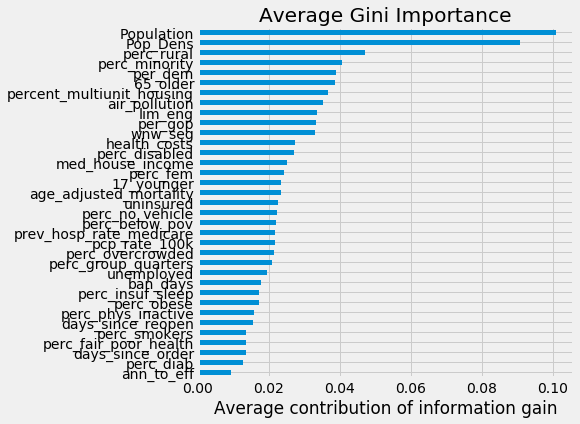

In [197]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

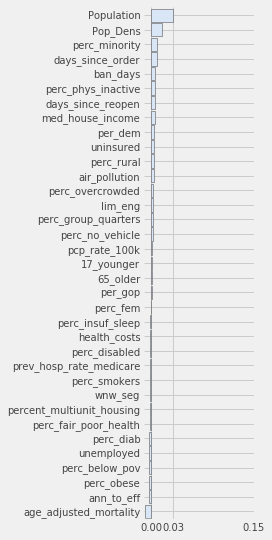

In [198]:
imp = importances(rfc, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [199]:
#rf1 = rfc.fit(X_train1, y_train1)
confusion_matrix(y_test, rfc.predict(X_test))

array([[411,  67],
       [105, 203]])

In [200]:
precision_score(y_test, rfc.predict(X_test))

0.7518518518518519

In [201]:
recall_score(y_test, rfc.predict(X_test))

0.6590909090909091

In [202]:
65, 60, 51
69, 63, 52
68, 60, 64
77, 73, 64
77, 72, 67
75, 72, 62
76, 73, 65
77, 76, 64
78, 75, 66

(77, 76, 64)

In [203]:
estimator_list = [5,10,30,40,50, 60, 70, 80, 90, 100,110,120,130, 140, 150]
score_list = []
for i in estimator_list:
    rfc = RandomForestClassifier(n_estimators=i, oob_score=True)
    rfc.fit(X_train, y_train)
    score_list.append(rfc.score(X_test, y_test))
score_list

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.7175572519083969,
 0.7519083969465649,
 0.7849872773536896,
 0.7735368956743003,
 0.772264631043257,
 0.77735368956743,
 0.7888040712468194,
 0.7837150127226463,
 0.7926208651399491,
 0.7900763358778626,
 0.7849872773536896,
 0.7709923664122137,
 0.7824427480916031,
 0.7837150127226463,
 0.7888040712468194]

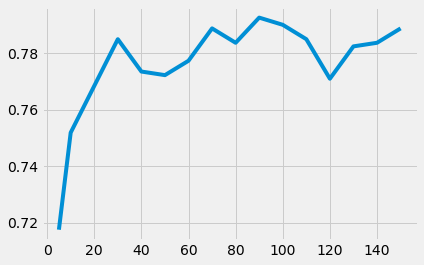

In [204]:
x = estimator_list
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)

In [205]:
max_features = []
score_list = []
for i in range(1, len(X.columns)):
    rfc = RandomForestClassifier(max_features=i, oob_score=True)
    rfc.fit(X_train, y_train)
    score_list.append(rfc.score(X_test, y_test))
    max_features.append(i)
score_list

[0.7659033078880407,
 0.77735368956743,
 0.7786259541984732,
 0.7964376590330788,
 0.7837150127226463,
 0.7888040712468194,
 0.7977099236641222,
 0.7811704834605598,
 0.7849872773536896,
 0.7811704834605598,
 0.7760814249363868,
 0.7786259541984732,
 0.7824427480916031,
 0.77735368956743,
 0.7824427480916031,
 0.7697201017811705,
 0.7849872773536896,
 0.7862595419847328,
 0.7697201017811705,
 0.7760814249363868,
 0.7735368956743003,
 0.7760814249363868,
 0.7862595419847328,
 0.7684478371501272,
 0.7709923664122137,
 0.772264631043257,
 0.7798982188295165,
 0.7888040712468194,
 0.7798982188295165,
 0.77735368956743,
 0.7824427480916031,
 0.7760814249363868,
 0.7811704834605598,
 0.7849872773536896]

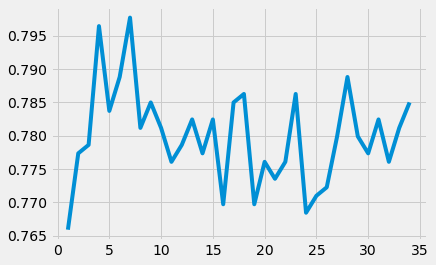

In [206]:
x = max_features
y = score_list
fig, ax = plt.subplots()
ax.plot(x,y)